# AdventureWorks Sales Analysis


In [ ]:
import pandas as pd 
from sqlalchemy import create_engine, text
from urllib.parse import quote_plus
from pathlib import Path

user = "SA"
password = quote_plus("Rallelek123")
server = 'localhost:1433'
database = 'AdventureWorks2025'
driver = quote_plus("ODBC Driver 18 for SQL server")


connection_string = (
    f"mssql+pyodbc://{user}:{password}@{server}/{database}"
    f"?driver={driver}&Encrypt=yes&TrustServerCertificate=yes"
)

engine = create_engine(connection_string)


try:
    with engine.connect():
        print("Connection to the database was successful!")
except Exception as e:
    print("There was an error", e)

def query_df(sql: str):
    with engine.connect() as conn:
        return pd.read_sql(text(sql), conn)
    
DATA_DIR = Path("..") / "data"

def read_sql_file(filename: str) -> str:
    return (DATA_DIR / filename).read_text(encoding="utf-8")

Anslutning till SQL Server lyckades


C:\Users\Ralle\AppData\Local\Temp\ipykernel_24052\1116291022.py:22: SAWarning: Unrecognized server version info '17.0.1000.7'.  Some SQL Server features may not function properly.
  with engine.connect():


# Visualisation 1

<Axes: title={'center': 'Number of Products per Category'}, xlabel='Category'>

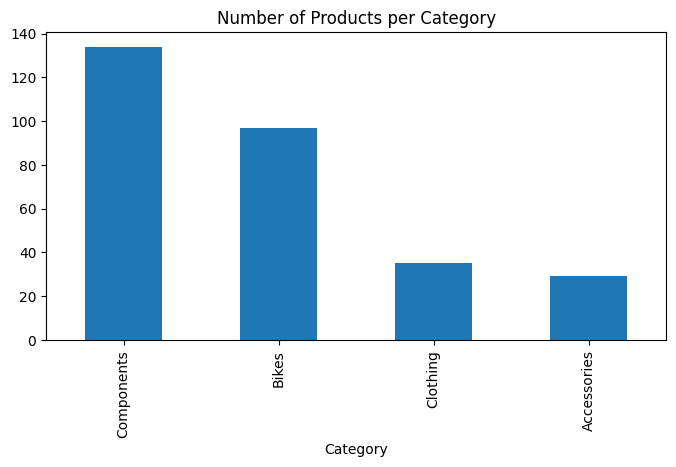

In [5]:
df = query_df(read_sql_file("vis1.sql"))

df.plot(
    kind="bar",
    x="Category",
    y="product_count",
    figsize=(8,4),
    legend=False,
    title="Number of Products per Category"
)